# Machine Learning - Final Project
## Accident Severity Prediction
**Team**: *Jennifer Lord, Konstantinos Georgiou, Russ Limber, Sanjeev Singh, Sara Howard*

## Where to put the code
- Place the preprocessing functions/classes in [\<project root\>/project_libs/project/preprocessing.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/preprocessing.py)
- The models in [\<project root\>/project_libs/project/models.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/models.py)
- Any plotting related functions in [\<project root\>/project_libs/project/plotter.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/plotter.py)


**The code is reloaded automatically. Any class object needs to reinitialized though.** 

## Config file
The yml/config file is located at: [confs/prototype1.yml](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/confs/prototype1.yml)<br>
To load it run:
```python
config_path='confs/prototype1.yml'
conf = Configuration(config_src=config_path)
# Get the dataset loader config
loader_config = conf.get_config('data_loader')['config']['dataset'] # type = Dict
print(books.keys())
print(loader_config['url'])
```
To reload the config just run the 2nd and 3rd command.

## Libraries Overview:
All the libraries are located under *"\<project root>/project_libs"*
- project_libs/**project**: This project's code (imported later)
- project_libs/**configuration**: Class that creates config objects from yml files
- project_libs/**fancy_logger**: Logger that can be used instead of prints for text formatting (color, bold, underline etc)

## For more info check out:
- the **[Project Board](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/projects/1)**
- and the **[Current Issues](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/issues)**

# ------------------------------------------------------------------

## On Google Collab?
- **If yes, run the two cells and press the two buttons below:**
- Otherwise go to "***Import the base Libraries***"

In [24]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/UTK-ML-Dream-Team/accident-severity-prediction.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

Cloning Project..
Cloning into 'accident-severity-prediction'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 186 (delta 103), reused 118 (delta 46), pack-reused 0
Receiving objects: 100% (186/186), 294.05 KiB | 3.77 MiB/s, done.
Resolving deltas: 100% (103/103), done.
Project cloned.


In [25]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/accident-severity-prediction')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        print("Dir Contents:")
        print(os.listdir())
        print("\nInstalling Requirements")
        !pip install -r requirements.txt
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

Changing dir..
done
Current dir:
/content/accident-severity-prediction
Dir Contents:
['setup.py', 'README.md', 'project_libs', 'main.ipynb', '.gitattributes', 'confs', 'Makefile', 'old_files', '.git', '.gitignore', 'accident-severity-prediction', 'data', 'requirements.txt']

Installing Requirements


### To commit and push Google Collab notebook to Github
Click **File > Save a copy on Gihtub**

# ------------------------------------------------------------------

# Initializations

## Import the base Libraries

In [26]:
!git init

Reinitialized existing Git repository in /content/accident-severity-prediction/.git/


In [27]:
# Imports
%load_ext autoreload
%autoreload 2
from importlib import reload as reload_lib
from typing import *
import os
import re
from pprint import pprint
import datetime 
# Numpy
import numpy as np
import pandas as pd

# Import preprocessing lib
from project_libs.project import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the YML file

In [28]:
from project_libs import Configuration

In [29]:
# The path of configuration and log save path
config_path = "confs/prototype1.yml"
# !cat "$config_path"
# Load the configuratåion
conf = Configuration(config_src=config_path)
# Get the books dict
loader_config = conf.get_config('data_loader')['config']['dataset']
preprocessing_config = conf.get_config('data_loader')['config']['preprocessing']
# print(books.keys())
# pprint(books)  # Pretty print the books dict

2021-11-18 17:44:34 Config       INFO     Configuration file loaded successfully from path: /content/accident-severity-prediction/confs/prototype1.yml
2021-11-18 17:44:34 Config       INFO     Configuration Tag: prototype_1


# ------------------------------------------------------------------

# Start of Project Code

In [30]:
from project_libs import project as proj

## Data Loading

In [31]:
# Download Dataset again if requested
should_download = loader_config['download']
if should_download:
    kaggle_dataset_name = loader_config['kaggle_dataset_name']
    !mkdir ~/.kaggle
    !cp confs/kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !mkdir data
    !cd data && kaggle datasets download -d $kaggle_dataset_name && unzip -o us-accidents.zip && rm us-accidents.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘data’: File exists
 89% 104M/117M [00:00<00:00, 172MB/s] 
100% 117M/117M [00:00<00:00, 172MB/s]
Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_updated.csv  


In [32]:
# Load Dataset
accidents_df_original = pd.read_csv(loader_config['local_dataset_name'])
accidents_df = accidents_df_original.copy()

## Exploration

### Sampling Tests

In [ ]:
# Print Basic Info
print(f"Number of rows: {accidents_df.shape[0]}")
print(f"Number of Columns: {accidents_df.shape[1]}")
print(f"Columns: {accidents_df.columns}")

In [ ]:
# -- Filter By Cities -- #
print("Unique Cities: ")
cities = accidents_df.City.unique().tolist()
print(f"{cities[:10]}, ..")
print(f"Number of cities: {len(cities)}")
print("----------------------------------------------------")

# Try different number of cities filters
for num_cities in [20, 50, 100, 500, 1000, 1500, 2000]:
    current_num = accidents_df[accidents_df.City.isin(cities[:num_cities])].shape[0]
    print(f"Number of rows when only FIRST {num_cities} were included: {current_num}")

In [ ]:
# -- Filter By Date -- #
accidents_df.loc[:, 'Start_Time_dt'] = pd.to_datetime(accidents_df.Start_Time)
print(f"Earliest date: {accidents_df.Start_Time_dt.min()}")
print(f"Most Recent date: {accidents_df.Start_Time_dt.max()}")
print("----------------------------------------------------")

# Try different date filters
dates = [(2017, 1), (2018, 1), (2019, 1), (2020, 1), (2020, 6), (2020, 9)]
for year, month in dates:
    condition = accidents_df.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
    current_num = accidents_df.Start_Time_dt[condition].shape[0]
    print(f"Number of rows when only dates STARTED FROM {month}/{year} were included: {current_num}")


In [ ]:
# -- Filter By States and Date -- #
print("Unique States: ")
states = accidents_df.State.unique().tolist()
print(states[:10])
print(f"Number of states: {len(states)}")
print("----------------------------------------------------")

# Filter By NE States
staes_of_choice =  ['PA', 'NY', 'VY', 'ME', 'NH', 'MA', 'RI', 'CT', 'NJ', 'DE', 'DC', 'MD']
accidents_df_filtered = accidents_df[accidents_df.State.isin(staes_of_choice)].copy()
print(f"Number of rows when only North Eastern states were included: {accidents_df_filtered.shape[0]}")

# By Date
year, month = 2020, 1
condition = accidents_df_filtered.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
current_num = accidents_df_filtered.Start_Time_dt[condition].shape[0]
print(f"Number of rows when only dates STARTED FROM {month}/{year} for the North Easter States were included: {current_num}")

### Correlation between features

In [33]:
from project_libs.project import plotter as pl

['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


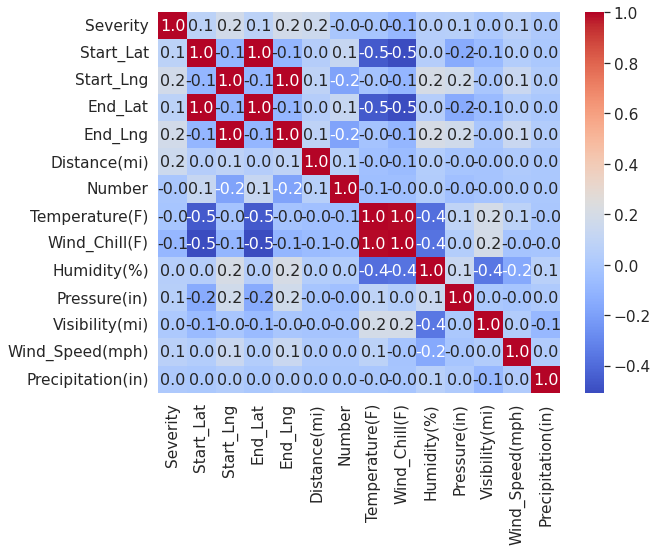

In [34]:
# Find Correlations between columns
cols_to_visualize = list(accidents_df_original.describe().columns)
print(cols_to_visualize)
pl.viz_columns_corr(accidents_df_original, cols_to_visualize)

## Preprocessing

In [35]:
from project_libs.project import preprocessing as pre

In [36]:
# Create a copy of the df
accidents_df_isolated = accidents_df_original.copy()

# Isolate city state
city_list = preprocessing_config['city_list']
state_list = preprocessing_config['state_list']
accidents_df_isolated = pre.isolate_city_state(accidents_df_isolated, city_list, state_list)
display(accidents_df_isolated)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
98138,A-2814738,3,2016-11-30 15:01:56,2016-11-30 21:01:56,33.662770,-111.999580,33.66622,-111.99952,0.238,At AZ-101-LOOP/Exit 15 - Accident.,NaN,Piestewa Fwy N,R,Phoenix,Maricopa,AZ,85050,US,US/Mountain,KDVT,2016-11-30 14:53:00,59.0,NaN,20.0,29.99,10.0,West,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
98139,A-2814739,2,2016-11-30 15:19:52,2016-11-30 21:19:52,33.668760,-112.072750,33.66898,-112.05849,0.820,At 7th St/Exit 26 - Accident.,NaN,Loop 101 E,R,Phoenix,Maricopa,AZ,85024,US,US/Mountain,KDVT,2016-11-30 14:53:00,59.0,NaN,20.0,29.99,10.0,West,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
98141,A-2814741,2,2016-11-30 17:05:39,2016-11-30 23:05:39,33.484250,-112.113190,33.47491,-112.11320,0.645,At Thomas Rd/Exit 201 - Accident.,NaN,Black Canyon Fwy S,R,Phoenix,Maricopa,AZ,85015,US,US/Mountain,KPHX,2016-11-30 16:51:00,60.1,NaN,20.0,29.96,10.0,NW,4.6,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
98142,A-2814742,2,2016-11-30 17:10:37,2016-11-30 23:10:37,33.295215,-111.972420,33.28853,-111.97132,0.466,At Chandler Blvd/Exit 160 - Accident.,NaN,Pearl Harbor Memorial Highway,R,Phoenix,Maricopa,AZ,85048,US,US/Mountain,KPHX,2016-11-30 16:51:00,60.1,NaN,20.0,29.96,10.0,NW,4.6,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
98146,A-2814746,2,2016-11-30 18:28:58,2016-12-01 00:28:58,33.461900,-112.092145,33.46190,-112.09904,0.397,At 19th Ave/Exit 143C - Accident.,1241.0,N Laurel Ave,R,Phoenix,Maricopa,AZ,85007-2021,US,US/Mountain,KPHX,2016-11-30 18:51:00,57.9,NaN,22.0,29.95,10.0,NW,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515761,A-4239104,3,2019-08-23 16:58:31,2019-08-23 17:26:11,41.815300,-87.630480,41.81212,-87.63042,0.220,At 47th St/Exit 56B - Accident.,NaN,I-90 E,R,Chicago,Cook,IL,60609,US,US/Central,KMDW,2019-08-23 16:53:00,73.0,73.0,49.0,29.53,10.0,NNE,15.0,0.0,Partly Cloudy,False,False,False,False,True,False,True,False,False,False,False,False,False,Day,Day,Day,Day
1515762,A-4239105,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.715130,-87.630040,41.71499,-87.63090,0.045,At I-57/Exit 63 - Accident. unconfirmed report.,NaN,I-57 S,R,Chicago,Cook,IL,60628,US,US/Central,KMDW,2019-08-23 15:53:00,73.0,73.0,49.0,29.53,10.0,ENE,15.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1515763,A-4239106,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.943350,-87.716690,41.94859,-87.72162,0.442,At Addison St/Exit 45A - Accident.,NaN,I-94 W,R,Chicago,Cook,IL,60618,US,US/Central,KORD,2019-08-23 15:51:00,72.0,72.0,51.0,29.49,10.0,NNE,12.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1515764,A-4239107,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.718620,-87.625210,41.71513,-87.63004,0.347,Ramp to I-57 Southbound - Accident. unconfirme...,NaN,I-57 S,R,Chicago,Cook,IL,60628,US,US/Central,KMDW,2019-08-23 15:53:00,73.0,73.0,49.0,29.53,10.0,ENE,15.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,Fals

In [ ]:
### --- Russ's Code --- ###

# Create a copy of the df
accidents_df_russ = accidents_df_isolated.copy()

env_vars = preprocessing_config['env_vars']
accidents_df_russ = pre.subset_df(accidents_df_russ, env_vars)

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))

temp_wind = pre.subset_df(accidents_df_russ, ['Temperature(F)', 'Wind_Speed(mph)'])
pre.OLS(temp_wind, np.array(accidents_df_russ['Wind_Chill(F)']))

accidents_df_russ["Wind_Temp"] = accidents_df_russ['Wind_Chill(F)'].fillna((accidents_df_russ['Temperature(F)']*1.0178 - accidents_df_russ['Wind_Speed(mph)']*0.3023))

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))
accidents_df_russ.drop("Wind_Chill(F)", axis=1)

accidents_df_russ = pre.knn_imputer(accidents_df_russ, 3)
accidents_df_russ = pre.basic_impute(accidents_df_russ)

#print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))


In [ ]:
### --- Sanjeev's Code --- ###

# Create a copy of the df
accidents_df_sanjeev = accidents_df_isolated.copy()

# Filter the infra variables
infra_vars = preprocessing_config['infra_vars']
accidents_df_infra = accidents_df_isolated[infra_vars].copy()

# Filter location and basic variables
accidents_df_sanjeev = pre.filter_loc_basic_var(accidents_df_sanjeev)

# Combine all Russ, Sanjeev, and Infra DF
X_raw = pd.concat([accidents_df_russ, accidents_df_sanjeev, accidents_df_infra], axis=1)
print('X_raw: Number of missing rows by column', '\n', X_raw.isnull().sum())

# Standardize, Encode, Extract and Split Train/Test
X_train, X_test, y_train, y_test = encode_std_extract_split(X_raw)

### PCA

In [ ]:
### --- Kostas's Code --- ###

# Create a copy of the df
X_train_PCA = X_train.copy()
X_test_PCA = X_test.copy()

# Retrieve Numerical Columns
numerical_cols = X_train_PCA.describe().columns
print("Number of columns to reduce using PCA (only numerical ones): ", len(numerical_cols))

# Check for Nulls
print("\nNull values per column:")
print(X_train_PCA[numerical_cols].isna().sum())

# Export to Numpy
X_train_PCA_np = X_train_PCA[numerical_cols].to_numpy()
X_test_PCA_np = X_test_PCA[numerical_cols].to_numpy()
print("\nType of exported Numpy array: ", X_train_PCA_np.dtype)

# Run PCA
pca = pre.PCA()
pca.fit(data=X_train_PCA_np, max_error=0.01)
X_train_PCA_np = pca.transform(data=X_train_PCA_np)
X_test_PCA_np = pca.transform(data=X_test_PCA_np)

# Drop the reduces columns from DF
X_train_PCA = X_train_PCA.drop(numerical_cols, axis=1)
X_test_PCA = X_test_PCA.drop(numerical_cols, axis=1)

# Add the new (reduced) columns to the Dataframe
num_new_cols = X_train_PCA_np.shape[1]
new_col_names = [f"PCA_{ind}" for ind in range(num_new_cols)]
X_train_PCA[new_col_names] = X_train_PCA_np
X_test_PCA[new_col_names] = X_test_PCA_np

# Print New columns
print("\nNumber of columns (after PCA): ", len(X_train_PCA.describe().columns))
print("\nColumns: ", X_train_PCA.columns)

## Create Model

In [ ]:
from project_libs.project import models

## Hyperparameter Tuning

## Training

## Testing

## Evaluation

## Plots

In [ ]:
from project_libs.project import plotter as pl